# Linear Algebra for Data Science

## Chapter 14

In [111]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from latools import matrix, imatrix, column, row, vec, frobenius_distance
import seaborn as sns
from skimage import io,color
from scipy.signal import convolve2d

plt.rcParams["figure.figsize"] = (12,10)
#plt.rcParams["figure.figsize"] = (9,8)

## Singular Value Decomposition

In [2]:
# Let's consider SVD as composition

A = imatrix(2)
x_0 = np.array([[1], [0]])
y_0 = np.array([[0], [1]])

A,x_0,y_0

(array([[-8,  5],
        [ 5,  9]]),
 array([[1],
        [0]]),
 array([[0],
        [1]]))

In [3]:
i = np.array([[1],[0]])
j = np.array([[0],[1]])

In [4]:
x = A @ x_0
y = A @ y_0

In [5]:
U, s, V = np.linalg.svd(A)

In [6]:
U, s, V

(array([[ 0.26274111,  0.96486637],
        [ 0.96486637, -0.26274111]]),
 array([10.36154146,  9.36154146]),
 array([[ 0.26274111,  0.96486637],
        [-0.96486637,  0.26274111]]))

In [7]:
x_1 = V @ x_0
y_1 = V @ y_0

i_1 = V @ i
j_1 = V @ j

In [8]:
S = np.diag(s)

In [9]:
x_2 = S @ x_1
y_2 = S @ y_1

i_2 = S @ i
j_2 = S @ j

In [10]:
x_3 = U @ x_2
y_3 = U @ y_2

i_3 = U @ i
j_3 = U @ j

(-8.649999999999999,
 5.649999999999999,
 -0.49451991096026754,
 13.80548008903973)

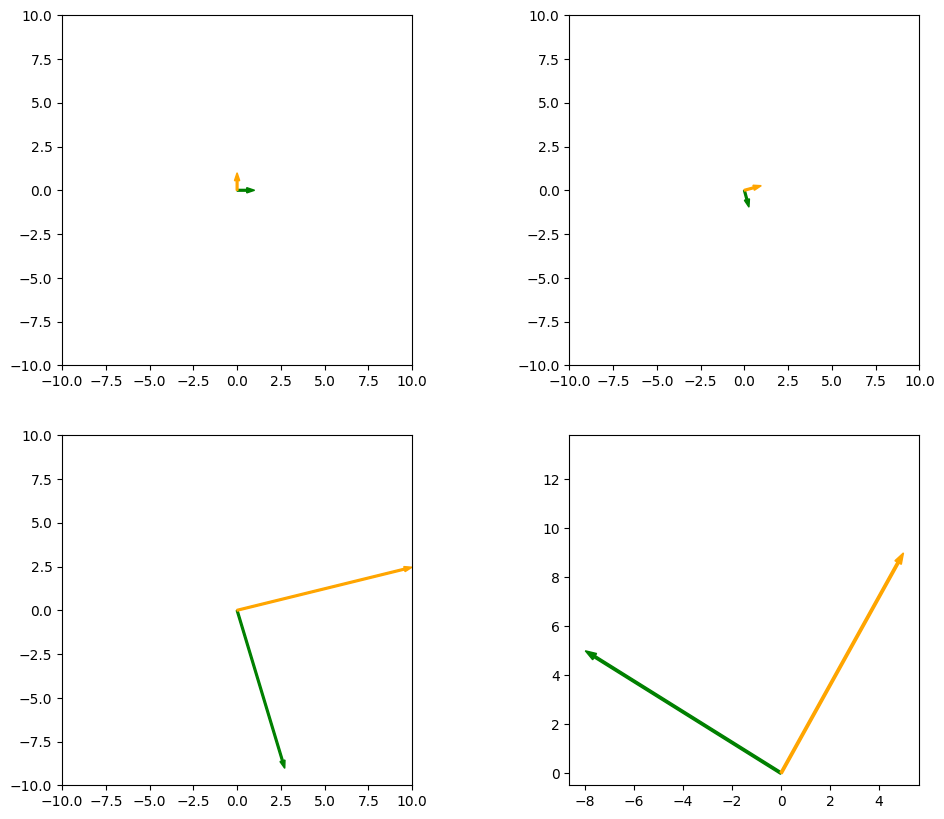

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)


ax1.arrow(0,0, x_0[0,0], x_0[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, y_0[0,0], y_0[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax1.axis('square')
ax1.axis([-10,10,-10,10])

ax2.arrow(0,0, x_1[0,0], x_1[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, y_1[0,0], y_1[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax2.axis('square')
ax2.axis([-10,10,-10,10])

ax3.arrow(0,0, x_2[0,0], x_2[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax3.arrow(0,0, y_2[0,0], y_2[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax3.axis('square')
ax3.axis([-10,10,-10,10])

ax4.arrow(0,0, x_3[0,0], x_3[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax4.arrow(0,0, y_3[0,0], y_3[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax4.axis('square')
ax4.axis([-10,10,-10,10])



#plt.arrow(0,0, x_2[0,0], x_2[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)
#plt.arrow(0,0, y_2[0,0], y_2[1,0], color = 'red', length_includes_head=True, width=0.1, head_width=0.3)

plt.axis('square')

(-10.0, 10.0, -10.0, 10.0)

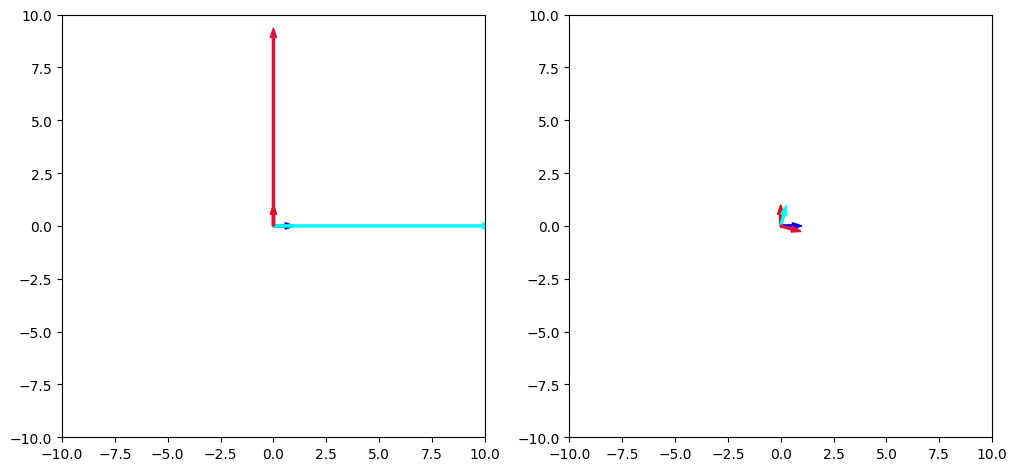

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.arrow(0,0, i[0,0], i[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, j[0,0], j[1,0], color = 'red', length_includes_head=True, width=0.1, head_width=0.3)

ax1.arrow(0,0, i_2[0,0], i_2[1,0], color = 'cyan', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, j_2[0,0], j_2[1,0], color = 'crimson', length_includes_head=True, width=0.1, head_width=0.3)

ax1.axis('square')
ax1.axis([-10,10,-10,10])

ax2.arrow(0,0, i[0,0], i[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, j[0,0], j[1,0], color = 'red', length_includes_head=True, width=0.1, head_width=0.3)

ax2.arrow(0,0, i_3[0,0], i_3[1,0], color = 'cyan', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, j_3[0,0], j_3[1,0], color = 'crimson', length_includes_head=True, width=0.1, head_width=0.3)

ax2.axis('square')
ax2.axis([-10,10,-10,10])



(-10.0, 10.0, -10.0, 10.0)

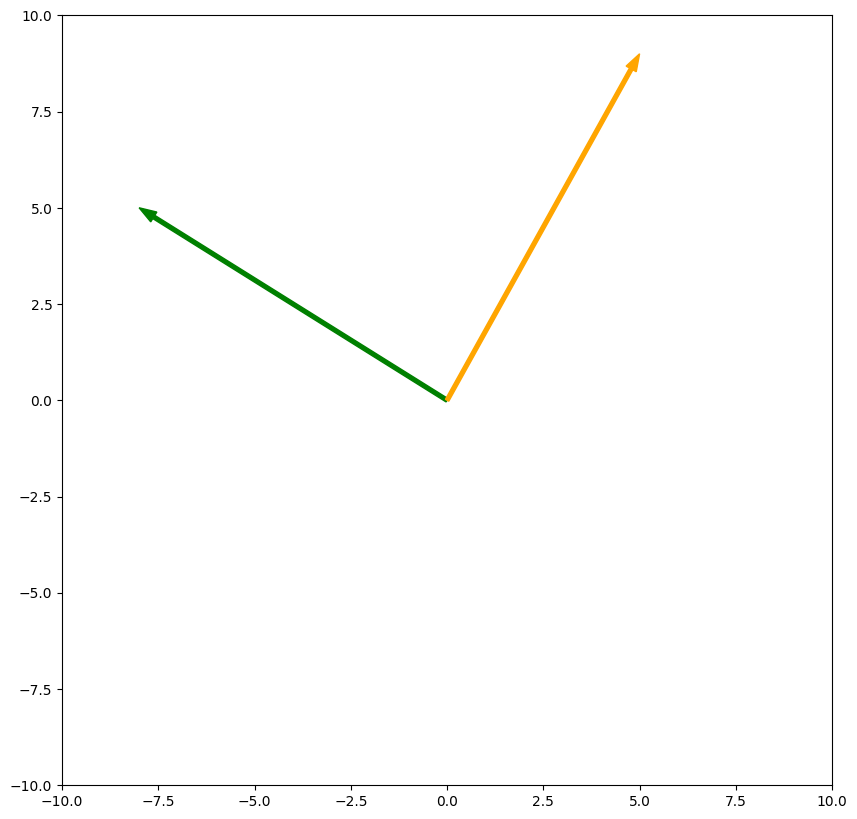

In [13]:
plt.arrow(0,0, x[0,0], x[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
plt.arrow(0,0, y[0,0], y[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
plt.axis('square')
plt.axis([-10,10,-10,10])

## Eigenvector decomposition

In [14]:
A = imatrix(2)
x_0 = np.array([[1], [0]])
y_0 = np.array([[0], [1]])

In [15]:
l, V = np.linalg.eig(A)
l = np.diag(l)
l ,V

(array([[-4.55743852,  0.        ],
        [ 0.        ,  8.55743852]]),
 array([[-0.76100739,  0.27333844],
        [-0.64874321, -0.96191793]]))

In [16]:
x = A @ x_0
y = A @ y_0

In [17]:
x_1 = np.linalg.inv(V) @ x_0
y_1 = np.linalg.inv(V) @ y_0

In [18]:
x_2 = l @ x_1
y_2 = l @ y_1

In [19]:
x_3 = V @ x_2
y_3 = V @ y_2

In [20]:
A @ x

array([[ 31],
       [-36]])

(-10.0, 10.0, -10.0, 10.0)

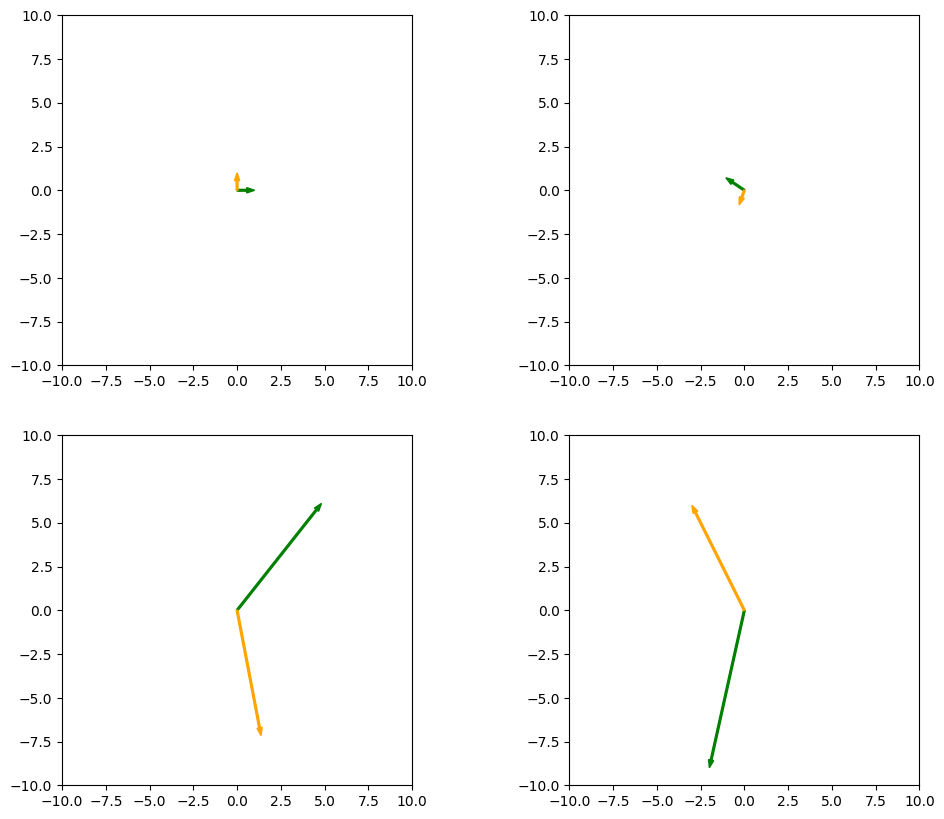

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)


ax1.arrow(0,0, x_0[0,0], x_0[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax1.arrow(0,0, y_0[0,0], y_0[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax1.axis('square')
ax1.axis([-10,10,-10,10])

ax2.arrow(0,0, x_1[0,0], x_1[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax2.arrow(0,0, y_1[0,0], y_1[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
ax2.axis('square')
ax2.axis([-10,10,-10,10])

ax3.arrow(0,0, x_2[0,0], x_2[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax3.arrow(0,0, y_2[0,0], y_2[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax3.axis('square')
ax3.axis([-10,10,-10,10])

ax4.arrow(0,0, x_3[0,0], x_3[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
ax4.arrow(0,0, y_3[0,0], y_3[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)

ax4.axis('square')
ax4.axis([-10,10,-10,10])

(-10.0, 10.0, -10.0, 10.0)

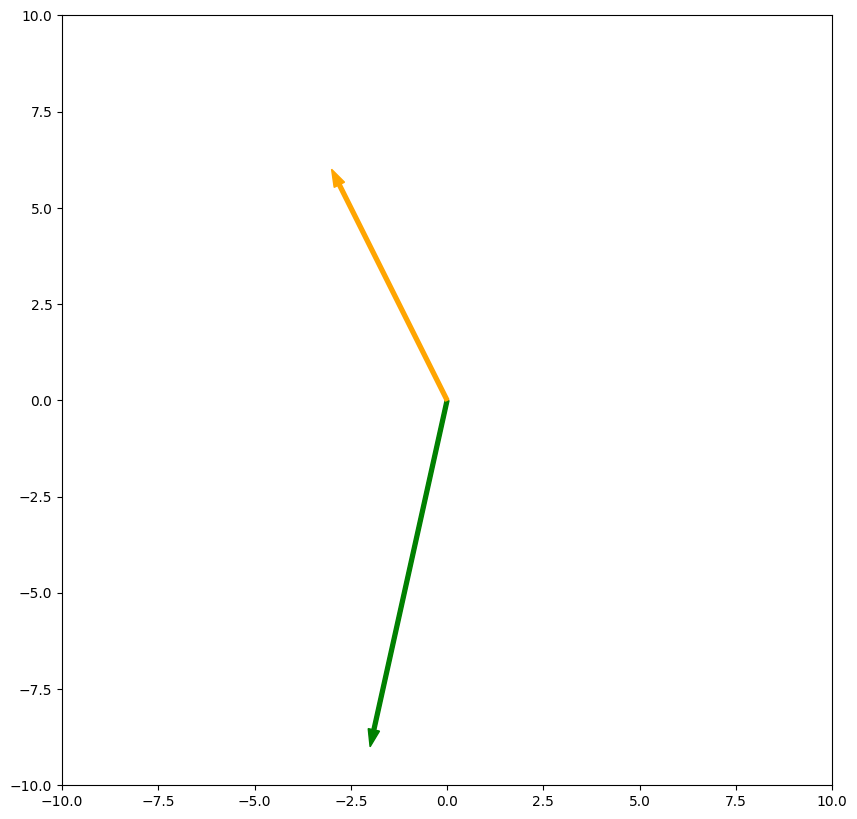

In [22]:
plt.arrow(0,0, x[0,0], x[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
plt.arrow(0,0, y[0,0], y[1,0], color = 'orange', length_includes_head=True, width=0.1, head_width=0.3)
plt.axis('square')
plt.axis([-10,10,-10,10])

## Exercises

### Exercise 14.1

In [23]:
def symmetrical_matrix(s=2, min=-3, max=3):
    '''Creates symmetrical matrix'''
    A = imatrix(s=s, min=min, max=max)
    return A @ A.T

In [24]:
A = symmetrical_matrix(5)

In [25]:
l, W = np.linalg.eig(A)

In [26]:
U, s, V = np.linalg.svd(A)

In [27]:
W, V.T

(array([[ 0.09101388, -0.18310183,  0.50265092, -0.83512508,  0.08999081],
        [-0.80929393,  0.20072578,  0.50850887,  0.18553623,  0.10838607],
        [-0.41275443, -0.85720558, -0.27738938, -0.03782067, -0.12828523],
        [-0.38932765,  0.43538267, -0.53433078, -0.49769274, -0.35448338],
        [-0.12172744,  0.04270134, -0.35539631, -0.13789105,  0.91544445]]),
 array([[-0.09101388, -0.08999081,  0.83512508,  0.50265092, -0.18310183],
        [ 0.80929393, -0.10838607, -0.18553623,  0.50850887,  0.20072578],
        [ 0.41275443,  0.12828523,  0.03782067, -0.27738938, -0.85720558],
        [ 0.38932765,  0.35448338,  0.49769274, -0.53433078,  0.43538267],
        [ 0.12172744, -0.91544445,  0.13789105, -0.35539631,  0.04270134]]))

<AxesSubplot:>

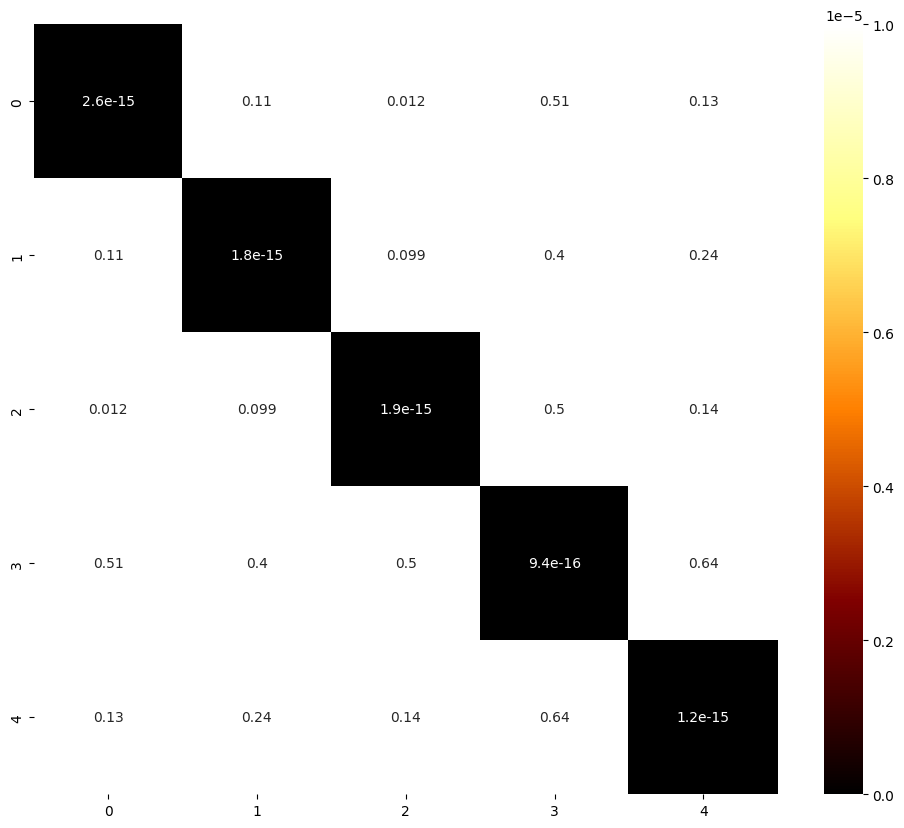

In [28]:
# difference matrix between V.T and W

sns.heatmap(np.abs(np.array([[np.sum(np.abs(i) - np.abs(j)) for j in V.T] for i in W])), 
            annot=True, 
            vmin=0, 
            vmax=1e-5, 
            cmap='afmhot'
           )

<AxesSubplot:>

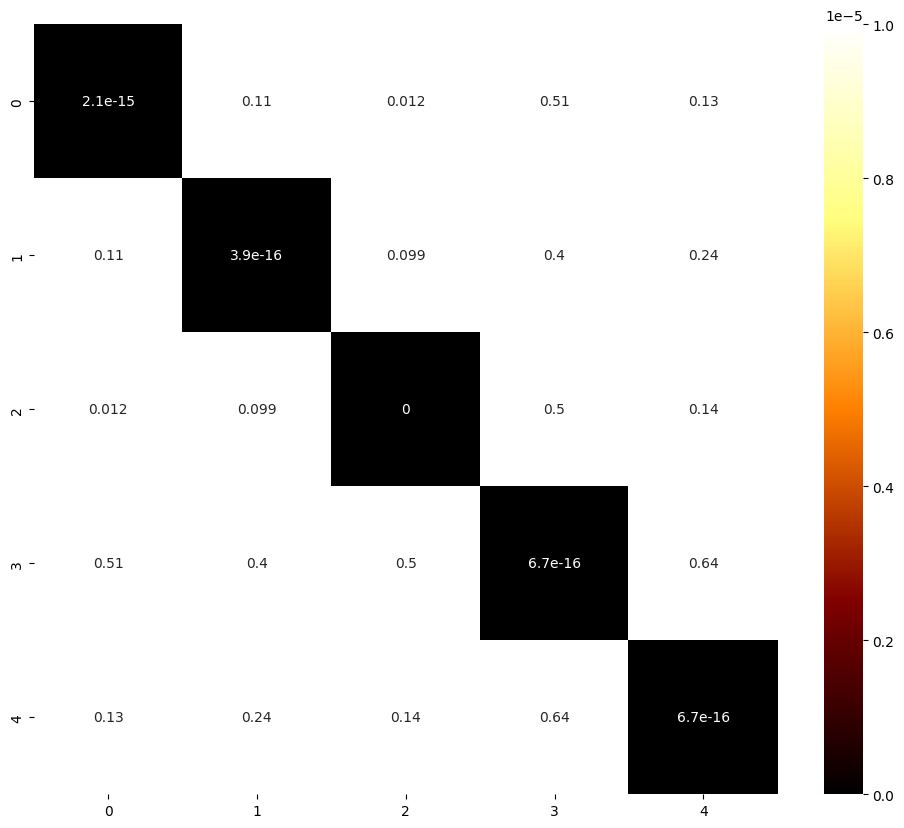

In [29]:
sns.heatmap(np.abs(np.array([[np.sum(np.abs(i) - np.abs(j)) for j in U] for i in W])), 
            annot=True, 
            vmin=0, 
            vmax=1e-5, 
            cmap='afmhot'
           )

In [30]:
B = imatrix(5)
B = B.T + B

In [31]:
l, W = np.linalg.eig(B)
U, s, V = np.linalg.svd(B)

<AxesSubplot:>

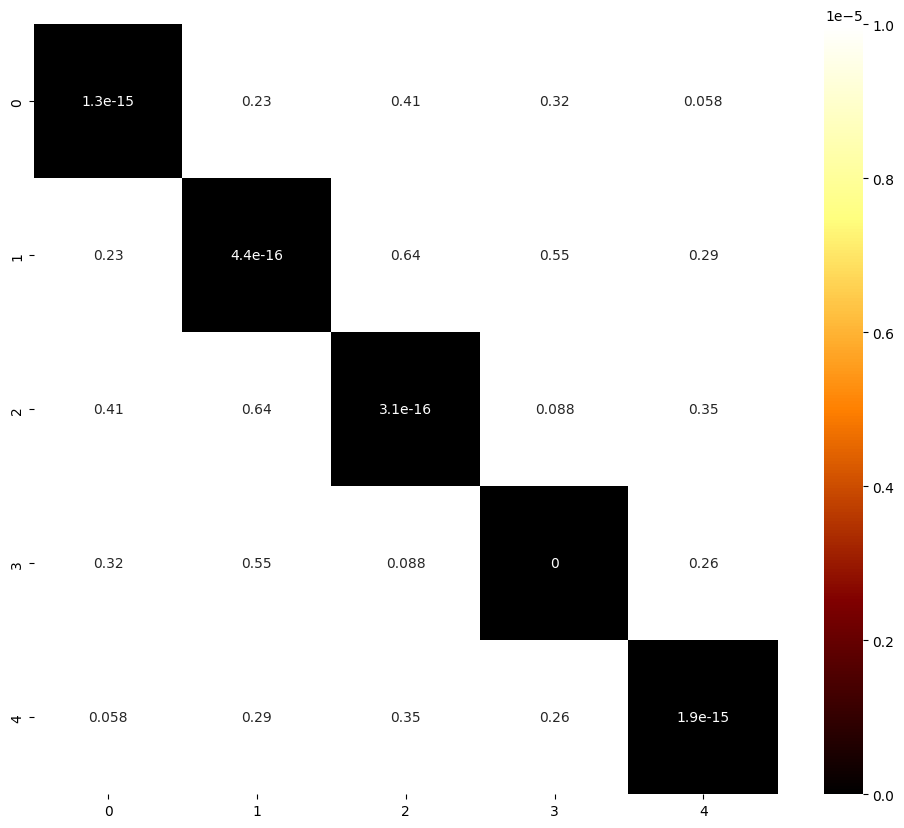

In [32]:
# difference matrix between V.T and W

sns.heatmap(np.abs(np.array([[np.sum(np.abs(i) - np.abs(j)) for j in V.T] for i in W])), 
            annot=True, 
            vmin=0, 
            vmax=1e-5, 
            cmap='afmhot'
           )

In [33]:
s, l

(array([27.73240659, 24.10117047, 15.90033773, 10.59089088,  6.8599925 ]),
 array([ 27.73240659,   6.8599925 , -24.10117047, -10.59089088,
        -15.90033773]))

In [34]:
V, W

(array([[ 0.21147907, -0.51008207,  0.00507033,  0.16575057,  0.81706421],
        [ 0.60884879,  0.55608396,  0.49786884,  0.22938034,  0.13994664],
        [ 0.03237834,  0.17911362,  0.10799826, -0.93271359,  0.29197892],
        [ 0.3624412 ,  0.33738108, -0.86046429,  0.01502301,  0.11910457],
        [ 0.67243422, -0.53355341,  0.00620402, -0.22300465, -0.46193444]]),
 array([[-0.21147907,  0.67243422, -0.60884879, -0.3624412 ,  0.03237834],
        [ 0.51008207, -0.53355341, -0.55608396, -0.33738108,  0.17911362],
        [-0.00507033,  0.00620402, -0.49786884,  0.86046429,  0.10799826],
        [-0.16575057, -0.22300465, -0.22938034, -0.01502301, -0.93271359],
        [-0.81706421, -0.46193444, -0.13994664, -0.11910457,  0.29197892]]))

### Exercise 14.2

In [35]:
A = np.random.randint(-9, 9, (3,5))

In [36]:
U,s,Vt = np.linalg.svd(A, full_matrices=False)

In [37]:
U,s,Vt

(array([[-0.43014339,  0.16347863, -0.88783523],
        [ 0.49692114,  0.86394393, -0.08167166],
        [ 0.75368829, -0.47631462, -0.45285576]]),
 array([16.90983322, 10.3545365 ,  7.40547867]),
 array([[ 0.68786688, -0.20175659,  0.16150538, -0.63623122,  0.23507293],
        [-0.0469157 , -0.48482952, -0.23858989, -0.25348502, -0.80097407],
        [ 0.59579788, -0.0537177 ,  0.36828154,  0.63859141, -0.3141799 ]]))

In [38]:
U_,s_,Vt_ = np.linalg.svd(A, full_matrices=True)

In [39]:
U_, s_, Vt_

(array([[-0.43014339,  0.16347863, -0.88783523],
        [ 0.49692114,  0.86394393, -0.08167166],
        [ 0.75368829, -0.47631462, -0.45285576]]),
 array([16.90983322, 10.3545365 ,  7.40547867]),
 array([[ 0.68786688, -0.20175659,  0.16150538, -0.63623122,  0.23507293],
        [-0.0469157 , -0.48482952, -0.23858989, -0.25348502, -0.80097407],
        [ 0.59579788, -0.0537177 ,  0.36828154,  0.63859141, -0.3141799 ],
        [ 0.24193835, -0.41168999, -0.7342717 ,  0.33429314,  0.34795165],
        [-0.33335985, -0.74287305,  0.49214293,  0.10679086,  0.28879385]]))

### Exercise 14.3

Prove that U and V are rotation matrices

I believe that might work:

The norm is in essence matrix multiplication:

$$ |x|^2 = x^t\cdot x $$

So let us consider

$$(Av)^t \cdot Av $$

$$ (Av)^t \cdot Av = v^t\cdot A^t \cdot A \cdot v = v^t\cdot (A^t \cdot A) \cdot v = v^t \cdot v$$

Which is true if 

$$ A^tA = E $$

That is true for orthogonal matrices

In [40]:
A = np.random.randint(-9, 9, (2,3))

In [41]:
A

array([[ 7,  7,  8],
       [-7,  7, -6]])

In [42]:
U, s, V = np.linalg.svd(A)

In [43]:
U

array([[-0.8,  0.6],
       [ 0.6,  0.8]])

In [44]:
V

array([[-6.96455673e-01, -9.94936676e-02, -7.10669055e-01],
       [-1.41421356e-01,  9.89949494e-01, -6.83013677e-16],
       [-7.03526471e-01, -1.00503782e-01,  7.03526471e-01]])

In [45]:
x = column(2)

In [46]:
x

array([[8.0566246 ],
       [1.99246974]])

In [47]:
U @ x

array([[-5.24981784],
       [ 6.42795055]])

In [48]:
U[0,:] @ U[1,:].T

-5.107025913275742e-17

In [49]:
U @ U.T

array([[ 1.00000000e+00, -5.10702591e-17],
       [-5.10702591e-17,  1.00000000e+00]])

In [50]:
(2*U) @ (2 * U).T

array([[ 4.00000000e+00, -2.04281037e-16],
       [-2.04281037e-16,  4.00000000e+00]])

In [51]:
np.linalg.norm(x), np.linalg.norm(U @ x), np.linalg.norm(2*U @ x)

(8.299345494973872, 8.299345494973872, 16.598690989947745)

(-9.12928004447126, 9.12928004447126, -9.12928004447126, 9.12928004447126)

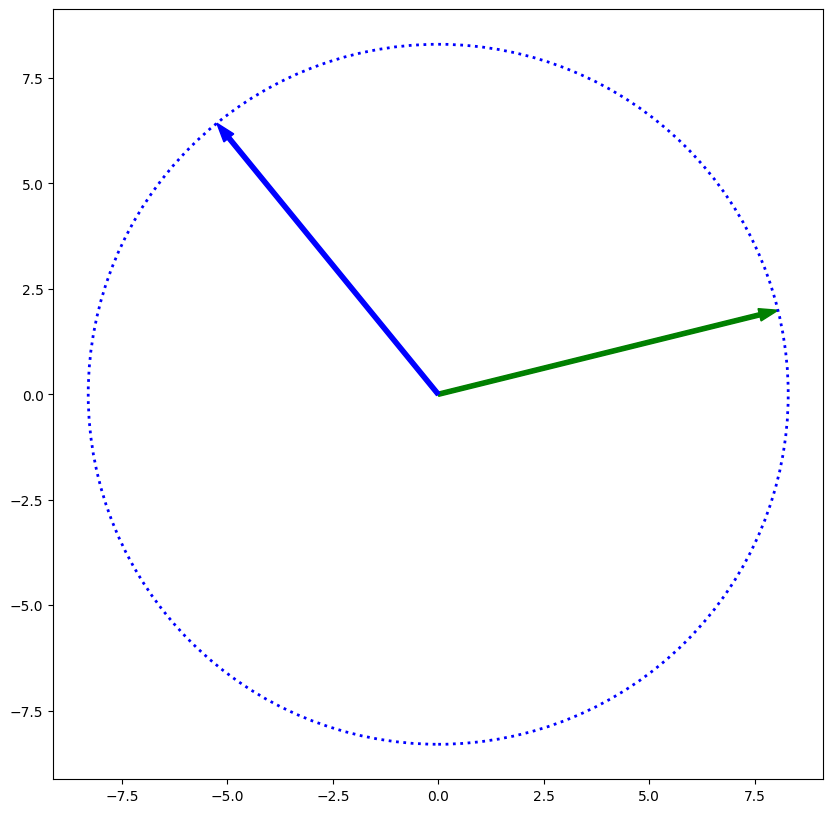

In [52]:
plt.arrow(0,0,x[0,0], x[1,0], color = 'green', length_includes_head=True, width=0.1, head_width=0.3)
plt.arrow(0,0,(U @ x)[0,0], (U @ x)[1,0], color = 'blue', length_includes_head=True, width=0.1, head_width=0.3)

r = np.linalg.norm(x)

circle1 = plt.Circle((0, 0), r, color='b', fill=False, linestyle=':', linewidth=2)
plt.gca().add_patch(circle1)

plt.axis('square')
#plt.axis([-,10,0,10])

### Exercise 14.4

In [53]:
U,_ = np.linalg.qr(imatrix(5))
V,_ = np.linalg.qr(imatrix(7))

sigma = np.array([[42, 0, 0, 0, 0,0,0],
                  [0, 14, 0, 0, 0,0,0],
                  [0, 0, 9, 0, 0,0,0],
                  [0, 0, 0, 2, 0,0,0],
                  [0, 0, 0, 0, 1,0,0]])

In [54]:
U, V

(array([[-0.27500955,  0.70420232, -0.37537231, -0.37997772,  0.37839318],
        [-0.82502865,  0.06632603,  0.50579834, -0.02082604, -0.24220426],
        [-0.27500955, -0.17277522, -0.06657816,  0.63733314,  0.69562367],
        [ 0.1833397 , -0.20962302,  0.57302437, -0.52934627,  0.56025025],
        [ 0.3666794 ,  0.6526154 ,  0.52007123,  0.41083111, -0.01957206]]),
 array([[-0.5143445 , -0.14122383,  0.48079173,  0.17791288,  0.40354451,
          0.21961628, -0.49154085],
        [ 0.4114756 , -0.42506699,  0.02097073, -0.26065315,  0.64262597,
          0.3007314 ,  0.27967578],
        [-0.36004115,  0.52358875, -0.14704323, -0.70812758,  0.17718444,
          0.19564479,  0.05905588],
        [-0.4114756 , -0.41892682,  0.15937693, -0.28070403,  0.0310725 ,
         -0.66160043,  0.33512947],
        [ 0.1028689 , -0.48870144, -0.09312117, -0.50489078, -0.43099547,
          0.14950098, -0.52810511],
        [-0.46291005, -0.30645013, -0.74229171,  0.25533329,  0.06152542,

In [55]:
B = U @ sigma @ V.T

In [56]:
B

array([[  2.94179266,  -8.5729688 ,  10.42254784,   0.30922788,
         -5.47099793,   4.66251692,  -0.44313009],
       [ 19.77502265, -14.70215408,  12.27925711,  14.59880336,
         -4.31680804,  12.35124536,   8.94721953],
       [  6.50188756,  -3.6223193 ,   2.20087158,   5.33434224,
         -0.89365945,   6.9011016 ,   2.14749014],
       [ -1.02885818,   5.16005921,  -4.21837781,  -0.80250887,
          2.03913352,  -6.72919613,   0.61212371],
       [ -6.82278859,   2.32468068,  -2.0345632 ,  -9.64978345,
         -3.72312212, -13.19478692,  -2.46205941]])

In [57]:
u, s, v = np.linalg.svd(B)

u,s,v

(array([[ 0.27500955,  0.70420232, -0.37537231, -0.37997772,  0.37839318],
        [ 0.82502865,  0.06632603,  0.50579834, -0.02082604, -0.24220426],
        [ 0.27500955, -0.17277522, -0.06657816,  0.63733314,  0.69562367],
        [-0.1833397 , -0.20962302,  0.57302437, -0.52934627,  0.56025025],
        [-0.3666794 ,  0.6526154 ,  0.52007123,  0.41083111, -0.01957206]]),
 array([42., 14.,  9.,  2.,  1.]),
 array([[ 0.5143445 , -0.4114756 ,  0.36004115,  0.4114756 , -0.1028689 ,
          0.46291005,  0.2057378 ],
        [-0.14122383, -0.42506699,  0.52358875, -0.41892682, -0.48870144,
         -0.30645013, -0.13033899],
        [ 0.48079173,  0.02097073, -0.14704323,  0.15937693, -0.09312117,
         -0.74229171,  0.40212969],
        [ 0.17791288, -0.26065315, -0.70812758, -0.28070403, -0.50489078,
          0.25533329,  0.00759752],
        [ 0.40354451,  0.64262597,  0.17718444,  0.0310725 , -0.43099547,
          0.06152542, -0.44975704],
        [ 0.42130572,  0.13814879,  0.

### Exercise 14.5

<AxesSubplot:>

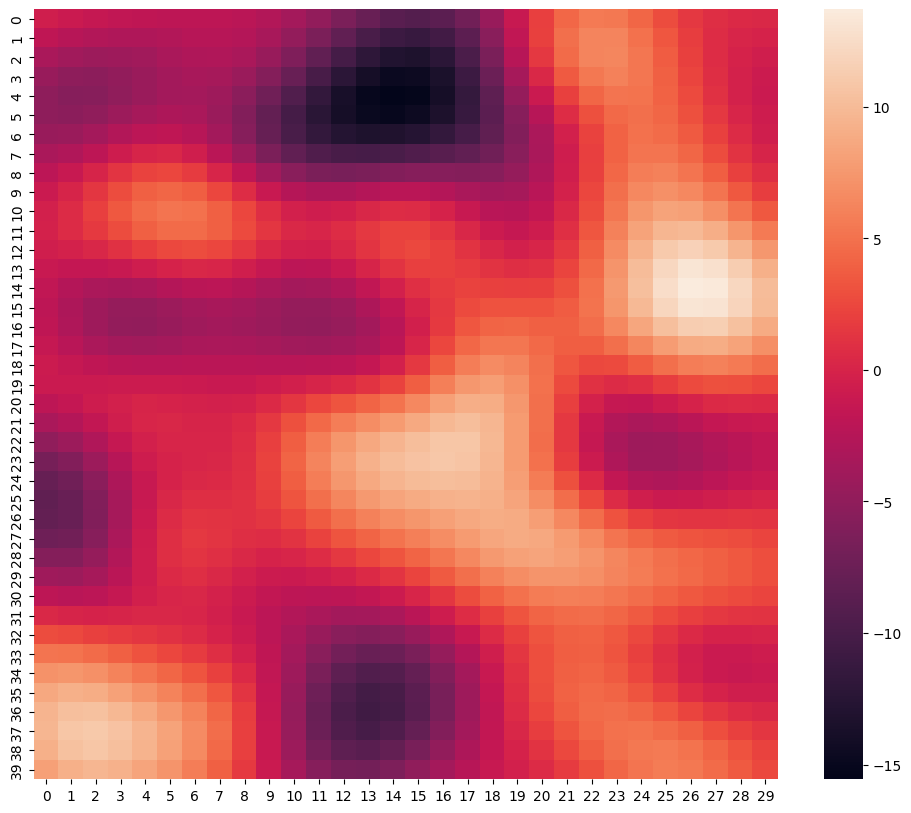

In [58]:
# create the matrix
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )


# now for the matrix
from scipy.signal import convolve2d
B = np.random.randn(m,n)
A = convolve2d(B,g2d,mode='same')

sns.heatmap(A)

<AxesSubplot:>

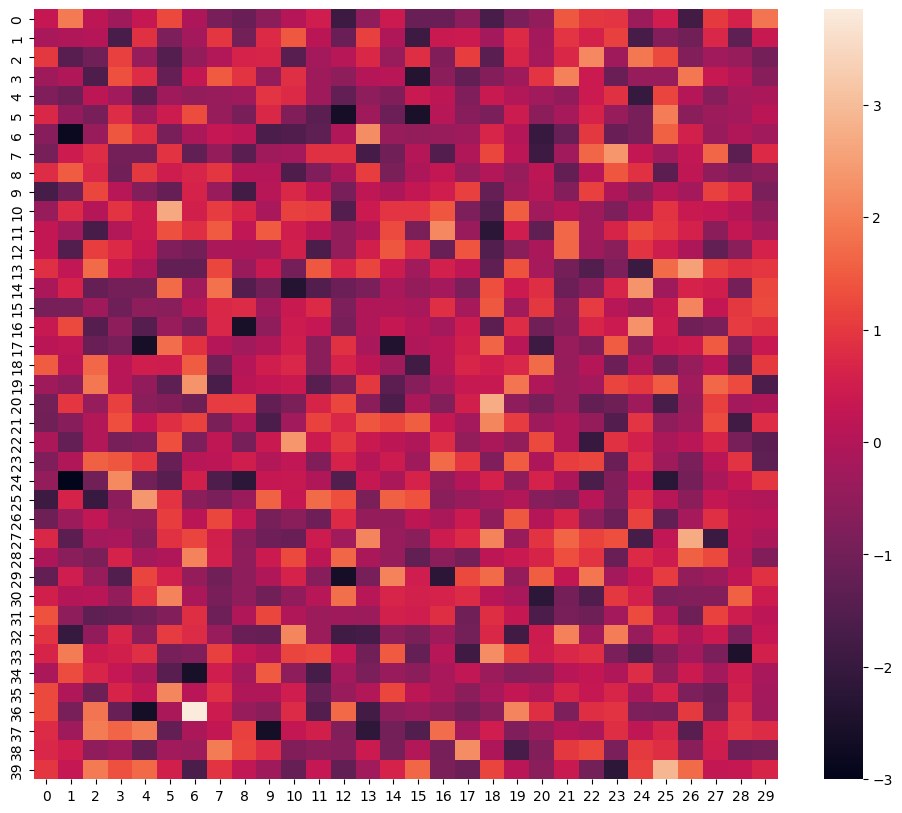

In [59]:
sns.heatmap(B)

In [60]:
U, s, V = np.linalg.svd(A)

In [61]:
S = np.zeros((40, 30))

np.fill_diagonal(S, s)

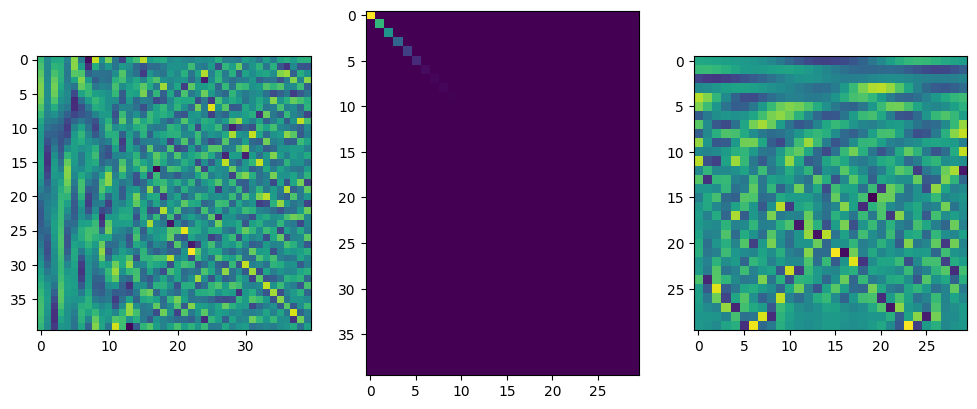

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(U)
ax2.imshow(S)
ax3.imshow(V)

In [63]:
def create_layer(U, S, V, i):
    return np.outer(U[:,i], V[i, :])*S[i,i]

def add_layers(U, S, V, n=1):
    layers = []
    for i in range(n):
        layer = create_layer(U, S, V, i)
        layers.append(layer)
    if n == 0:
        return create_layer(U, S, V, 0)
    return sum(layers)

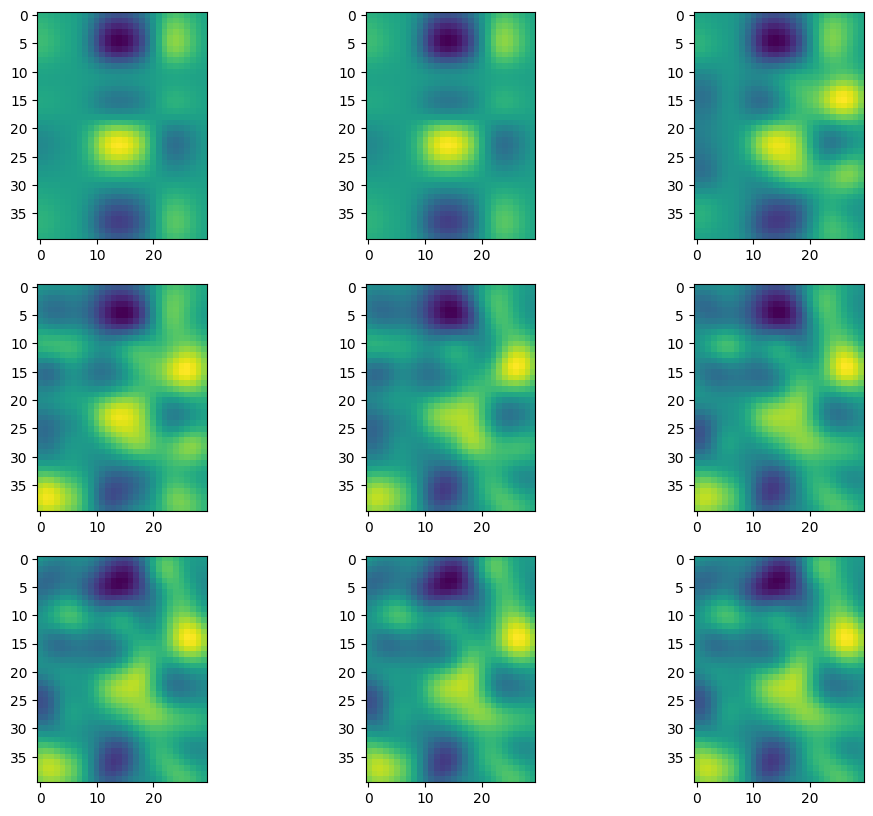

In [64]:
fig, ax = plt.subplots(3,3)

for i in range(0, 9):
    y = i // 3
    x = i % 3
    ax[y, x].imshow(add_layers(U, S, V, n=i))

### Case with real picture

In [65]:
picture = io.imread('https://upload.wikimedia.org/wikipedia/commons/8/8b/Portrait_of_a_Man_by_Jan_van_Eyck-small.jpg',
                   as_gray=True)

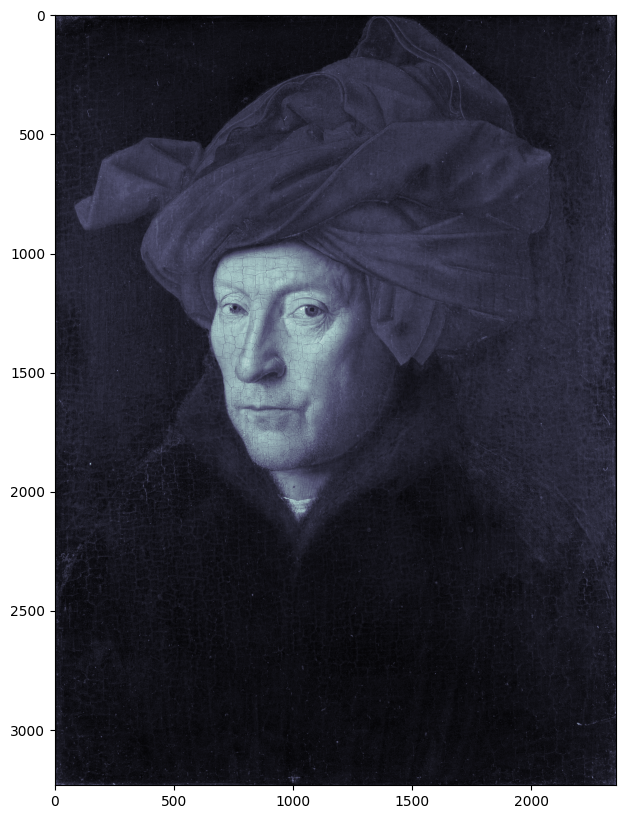

In [66]:
plt.imshow(picture, cmap='bone')

In [67]:
# create the matrix
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
kernel = np.exp( -(X**2 + Y**2)/(k/8) )

smooth_picture = convolve2d(picture,kernel,mode='same')

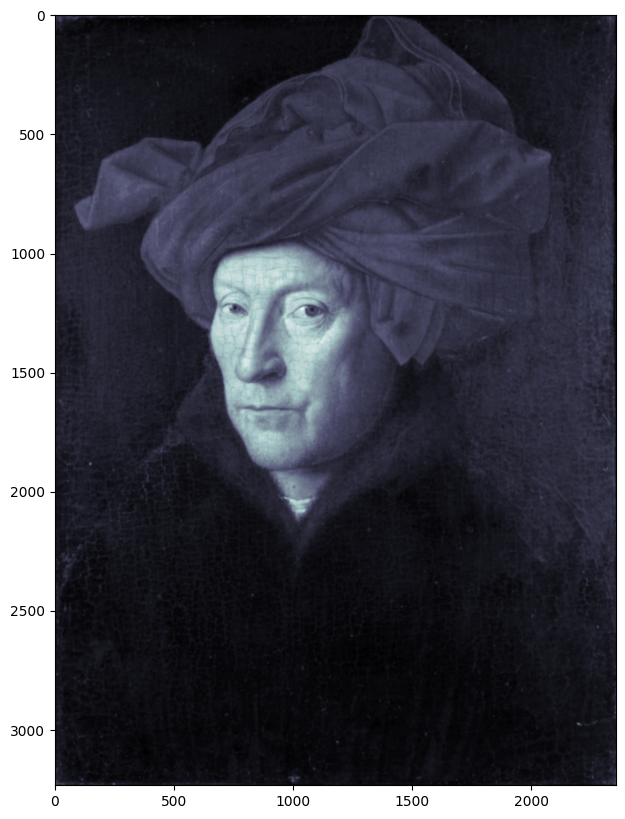

In [68]:
# now for the matrix
plt.imshow(smooth_picture, cmap='bone')

In [69]:
U, s, V = np.linalg.svd(picture)

In [70]:
len(s)

2356

In [71]:
S = np.zeros(picture.shape)

np.fill_diagonal(S, s)

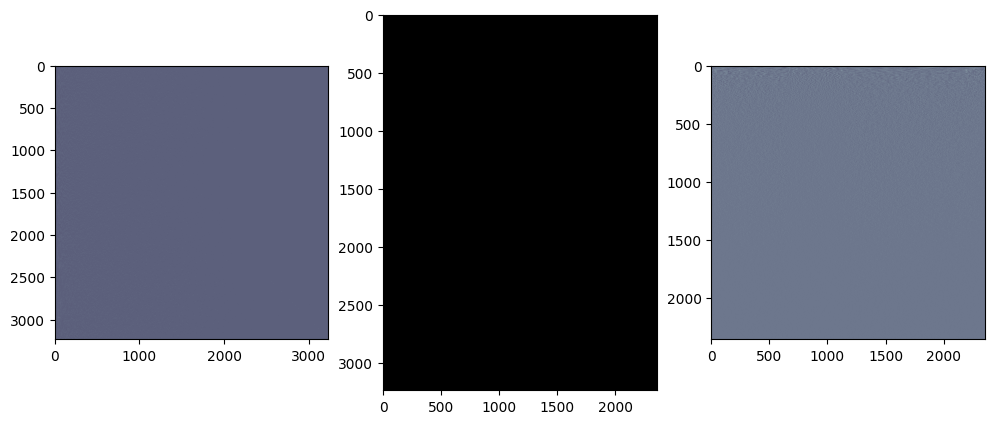

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(U, cmap='bone')
ax2.imshow(S, cmap='bone')
ax3.imshow(V, cmap='bone')

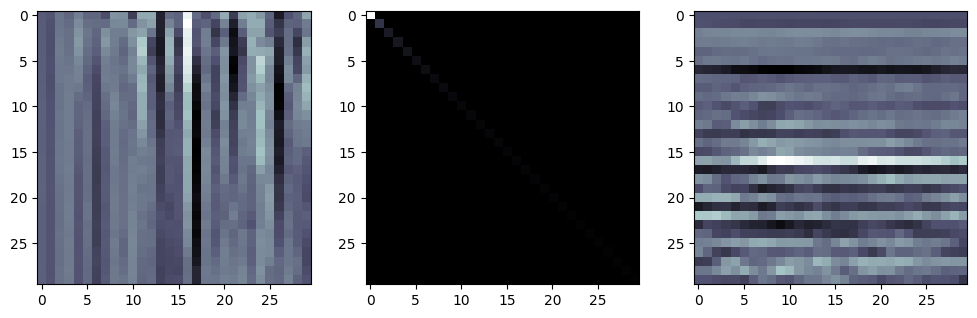

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(U[:30, :30], cmap='bone')
ax2.imshow(S[:30, :30], cmap='bone')
ax3.imshow(V[:30, :30], cmap='bone')

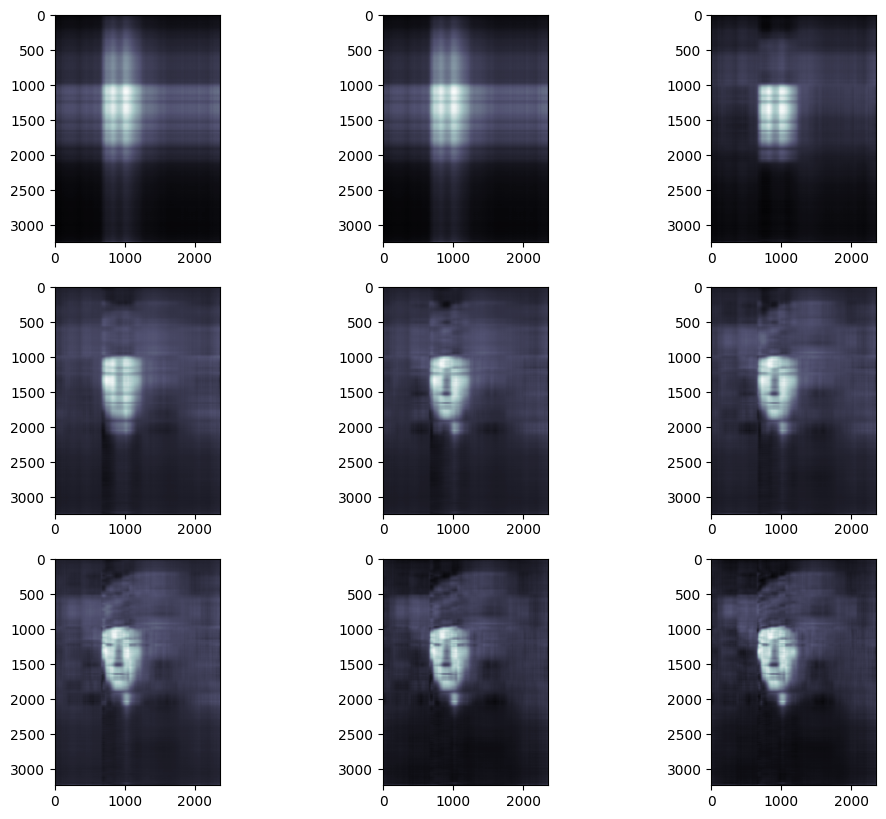

In [74]:
fig, ax = plt.subplots(3,3)

for i in range(0, 9):
    y = i // 3
    x = i % 3
    ax[y, x].imshow(add_layers(U, S, V, n=i), cmap='bone')

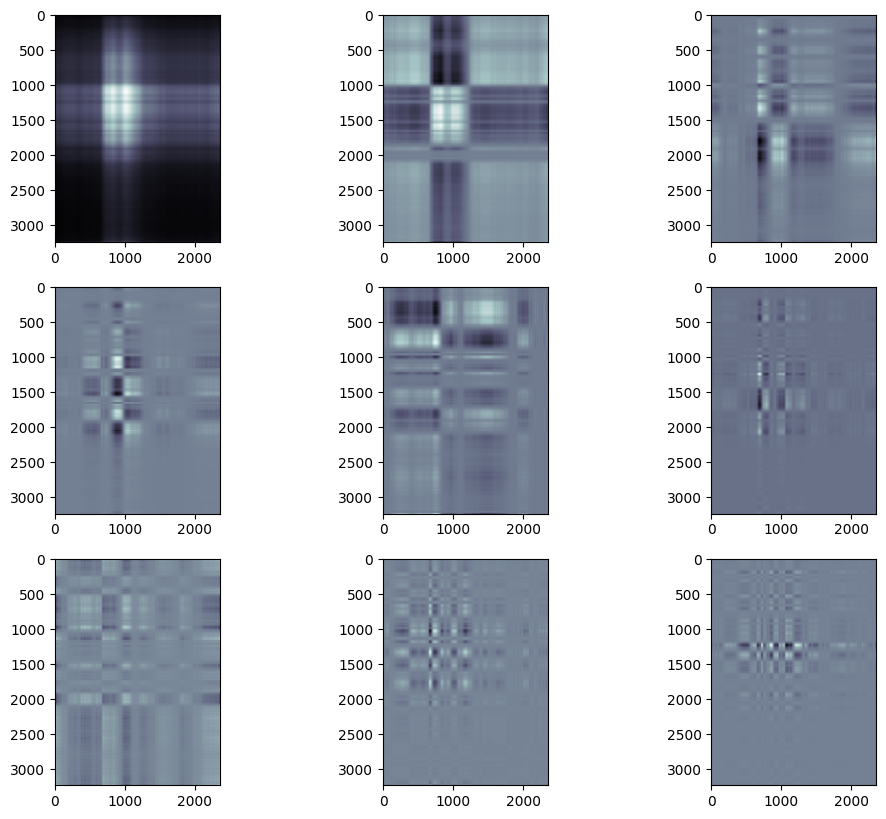

In [75]:
fig, ax = plt.subplots(3,3)

for i in range(0, 9):
    y = i // 3
    x = i % 3
    ax[y, x].imshow(create_layer(U, S, V, i), cmap='bone')

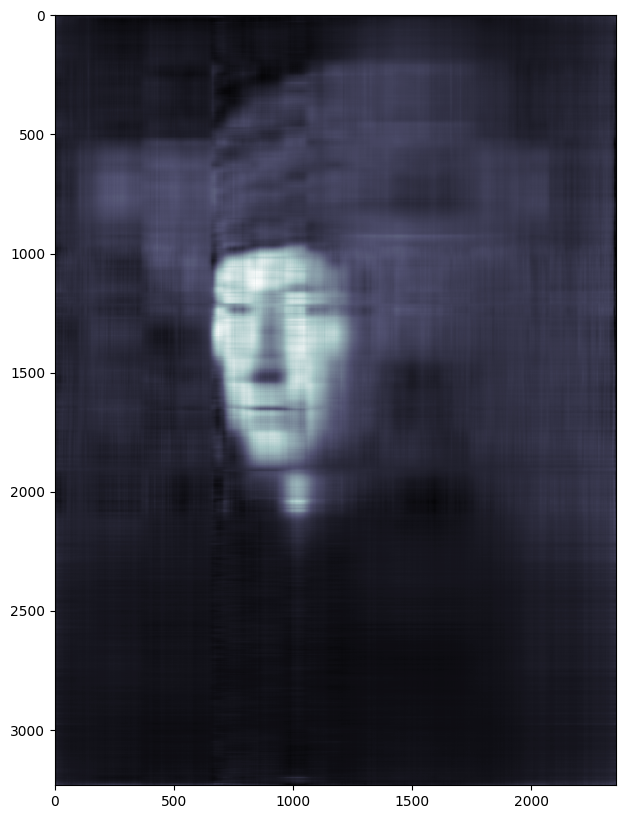

In [76]:
plt.imshow(add_layers(U, S, V, 8), cmap='bone')

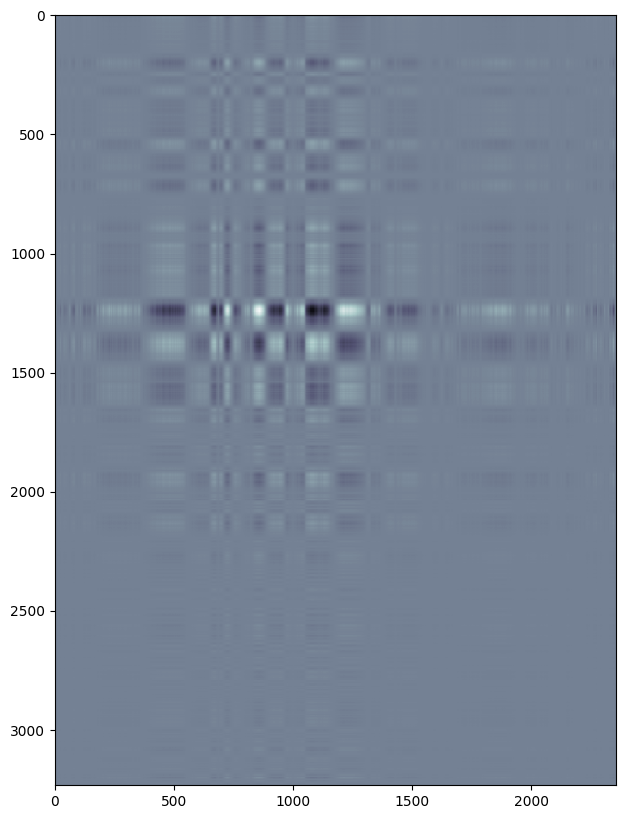

In [77]:
plt.imshow(create_layer(U, S, V, 8), cmap='bone')

### Exercise 14.6

In [78]:
def moore_penrose(A, tol=1e-15):
    U,s,V = np.linalg.svd(A)
    s = np.array([1/i if i > tol else 0 for i in s ])
    S = np.zeros(A.shape)
    np.fill_diagonal(S, s)
    
    return V.T @ S @ U.T

In [79]:
# tests

A = imatrix(6)
np.round(moore_penrose(A) @ A, 5)

array([[ 1., -0.,  0., -0.,  0., -0.],
       [-0.,  1., -0., -0.,  0., -0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -0.,  0.],
       [ 0., -0.,  0.,  0.,  1.,  0.],
       [-0.,  0., -0., -0.,  0.,  1.]])

In [80]:
# tests 2

B = np.random.randn(5,3) @ np.random.randn(3,5)

In [81]:
B

array([[-0.37388039,  0.40201609, -0.37533862, -0.55692406,  0.42651495],
       [-0.84196591,  1.3720691 , -1.19937171, -1.08228666,  1.36703386],
       [ 0.67991815, -0.14838465, -0.14751835,  0.94792586,  0.83313496],
       [-0.15804105, -0.26310775,  0.30781533, -0.29555153, -0.58835353],
       [-0.2718798 ,  0.260394  , -0.3763037 , -0.50865782,  0.64450181]])

In [82]:
np.linalg.matrix_rank(B)

3

In [83]:
U, s, V = np.linalg.svd(B)

In [84]:
moore_penrose(B)

array([[-2.68717524e-02, -1.29738402e-01,  2.69350257e-01,
        -5.62296001e-02,  8.61314858e-02],
       [-5.32429437e-01,  8.80252337e-01, -3.90212242e-01,
        -7.48546376e-01, -1.82996703e+00],
       [ 1.02496779e-01, -3.07101881e-01,  7.73784365e-04,
         2.37150799e-01,  3.93768831e-01],
       [-4.60239651e-01,  3.56957504e-01,  1.14997837e-01,
        -6.12323072e-01, -1.23959636e+00],
       [ 3.83036925e-01, -2.99994542e-01,  5.87022487e-01,
         2.68327251e-01,  1.25759181e+00]])

In [85]:
np.linalg.pinv(B)

array([[-2.68717524e-02, -1.29738402e-01,  2.69350257e-01,
        -5.62296001e-02,  8.61314858e-02],
       [-5.32429437e-01,  8.80252337e-01, -3.90212242e-01,
        -7.48546376e-01, -1.82996703e+00],
       [ 1.02496779e-01, -3.07101881e-01,  7.73784365e-04,
         2.37150799e-01,  3.93768831e-01],
       [-4.60239651e-01,  3.56957504e-01,  1.14997837e-01,
        -6.12323072e-01, -1.23959636e+00],
       [ 3.83036925e-01, -2.99994542e-01,  5.87022487e-01,
         2.68327251e-01,  1.25759181e+00]])

In [86]:
c = column(5)
d = column(5)

C = np.hstack([c, c+d, d, d*2, column(5)])

In [87]:
np.linalg.matrix_rank(C)

3

In [88]:
np.linalg.pinv(C)

array([[ 0.04746606, -0.04969741,  0.02161127,  0.0062476 ,  0.01625679],
       [ 0.02098908, -0.03524698,  0.03119746,  0.00017185,  0.01813409],
       [-0.02647698,  0.01445042,  0.00958619, -0.00607575,  0.00187729],
       [-0.05295395,  0.02890085,  0.01917238, -0.0121515 ,  0.00375459],
       [ 0.07630461,  0.0642867 , -0.08386067,  0.05821671, -0.03300313]])

In [89]:
moore_penrose(C)

array([[ 0.04746606, -0.04969741,  0.02161127,  0.0062476 ,  0.01625679],
       [ 0.02098908, -0.03524698,  0.03119746,  0.00017185,  0.01813409],
       [-0.02647698,  0.01445042,  0.00958619, -0.00607575,  0.00187729],
       [-0.05295395,  0.02890085,  0.01917238, -0.0121515 ,  0.00375459],
       [ 0.07630461,  0.0642867 , -0.08386067,  0.05821671, -0.03300313]])

Somehow sometimes it makes sense, sometimes not

In [90]:
np.round(np.linalg.pinv(C) @ C,3)

array([[ 0.545,  0.455, -0.091, -0.182,  0.   ],
       [ 0.455,  0.545,  0.091,  0.182,  0.   ],
       [-0.091,  0.091,  0.182,  0.364, -0.   ],
       [-0.182,  0.182,  0.364,  0.727,  0.   ],
       [-0.   , -0.   , -0.   , -0.   ,  1.   ]])

### Exercise 14.7

In [107]:
A = np.array([vec(7),vec(7), vec(7)]).T
A

array([[0.17959831, 3.29859709, 8.35970451],
       [2.136292  , 5.19028938, 5.93942941],
       [4.53976524, 6.16097552, 1.83663731],
       [6.67187341, 6.25780173, 4.23462252],
       [3.32636068, 7.4415154 , 3.55309869],
       [5.09583398, 4.11292591, 2.69461056],
       [4.90627126, 8.0768455 , 8.36320718]])

In [108]:
np.linalg.matrix_rank(A)

3

In [109]:
np.linalg.pinv(A)

array([[-0.02443751, -0.04824257, -0.02371067,  0.14238854, -0.13776755,
         0.13553997,  0.00665823],
       [-0.0472123 ,  0.03742374,  0.08927642, -0.09016063,  0.18512475,
        -0.09503892, -0.00136797],
       [ 0.09584614,  0.01880912, -0.06172567,  0.02622268, -0.08110064,
         0.02735865,  0.03632595]])

In [110]:
np.linalg.inv(A.T @ A) @ A.T 

array([[-0.02443751, -0.04824257, -0.02371067,  0.14238854, -0.13776755,
         0.13553997,  0.00665823],
       [-0.0472123 ,  0.03742374,  0.08927642, -0.09016063,  0.18512475,
        -0.09503892, -0.00136797],
       [ 0.09584614,  0.01880912, -0.06172567,  0.02622268, -0.08110064,
         0.02735865,  0.03632595]])

In [112]:
frobenius_distance(np.linalg.pinv(A), np.linalg.inv(A.T @ A) @ A.T )

2.408800541612914e-16

### Exercise 14.8